In [1]:
import numpy as np  
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model

from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
from Autoencoder_Functions import *
os.chdir('Synthetic')

Using TensorFlow backend.


## Parameters

In [2]:
k = 50 # Define the k parameter for the precision at k

## Read Data

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()
# The length of one image vector
img_size = data.shape[1]

## Load the Saved Models¶

In [4]:
# Generate and Compile a Deep Autoencoder
# Specify the model config
encoder_layers_size, decoder_layers_size = get_deep_model_config()
# Extract the saved model
autoencoder, encoder = compile_autoencoder(img_size,encoder_layers_size, decoder_layers_size) 
autoencoder = load_model('model_autoencoder.h5') # Load the saved model

### Compare the original and the reconstructed data

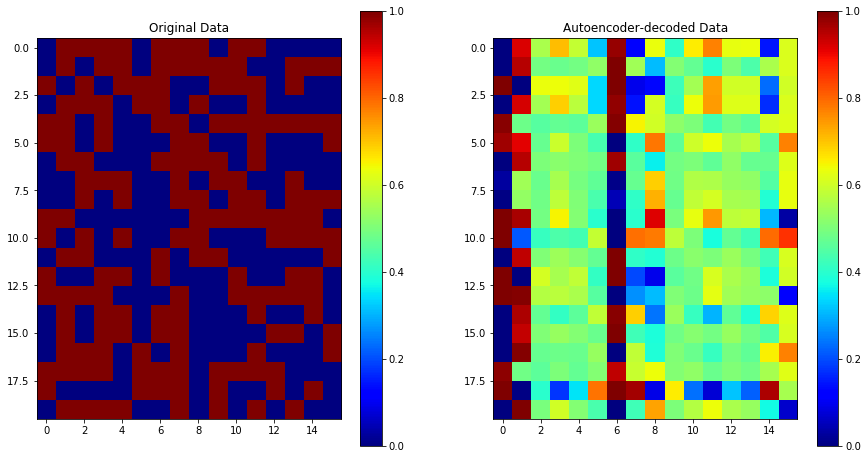

In [5]:
data_decoded,data = reconstruct_with_autoencoder(autoencoder,data,image = False)
plot_2datasets(data[:20],data_decoded[:20],'Original Data', 'Autoencoder-decoded Data')

## Implement the Anomaly Detection¶with the Construction Error

In [6]:
data_train_decoded,data_train = reconstruct_with_autoencoder(autoencoder,data_train,image = False)
data_test_decoded,data_test = reconstruct_with_autoencoder(autoencoder,data_test,image=False)

The higher the reconstruction error, the more likely the point will be an anomaly


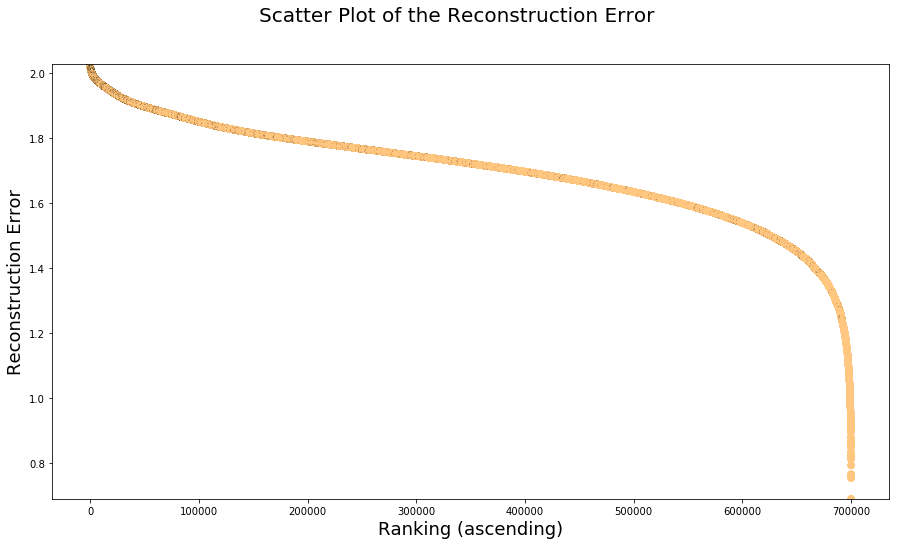

Training Results:
Precision: 6.4%
Recall: 34.2%
F-score: 4.4%
R-Precision (# R = 7473): 12.3%
Precision@50: 58.0%

Testing Results:
Precision: 6.3%
Recall: 34.2%
F-score: 4.3%
R-Precision (# R = 3161): 11.8%
Precision@50: 30.0%


In [7]:
train_test_with_reconstruction_error(data_train, data_train_decoded, data_test, data_test_decoded, labels_train, labels_test,k)